In [75]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [46]:
X = read_csv('wino.csv')
y = X.pop('czerwone')
K = X.columns
skróty = {
    'kwasowość': 'kw.',
    'lotna kwasowość': 'kw.lot',
    'kwas cytrynowy': 'kws.cyt.',
    'pozostały cukier': 'cuk.',
    'wolne chlorki': 'chl.',
    'dwutlenek siarki': 'SO2',
    'dwutlenek siarki całkowity': 'SO2-c.',
    'gęstość': 'gęst.',
    'siarczany': 'siar.',
    'alkohol': 'alk.',
    'pH': 'pH',
    'jakość': 'jak.',
    'czerwone': 'cz.'
}; K_s = [skróty[k] for k in K]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Ocena drzewa

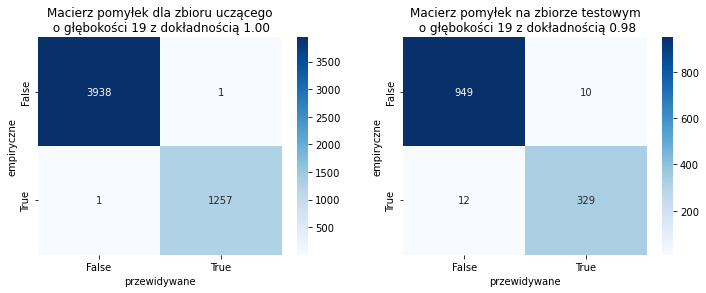

In [47]:
from seaborn import heatmap
from pandas import DataFrame
import matplotlib.pyplot as plot
def tree_quality_plot(X, y, model, title = 'Jakość modelu drzewa decyzyjnego', ax = None):

    if ax is None:
        ax = plot.gca()

    score = accuracy_score(y, model.predict(X))

    matrix = confusion_matrix(y, model.predict(X))
    matrix = DataFrame(matrix, index=model.classes_, columns=model.classes_)

    heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('przewidywane')
    ax.set_ylabel('empiryczne')
    ax.set_title('Macierz pomyłek')

    ax.set_title(title + f' o głębokości {model.get_depth()}' + f' z dokładnością {score:.2f}')


M0 = DecisionTreeClassifier(random_state=42)
M0.fit(X, y);

fig, axes = plot.subplots(1, 2, figsize=(12, 4))

tree_quality_plot(X, y, M0, title='Macierz pomyłek dla zbioru uczącego\n', ax=axes[0])
tree_quality_plot(X_test, y_test, M0, title='Macierz pomyłek na zbiorze testowym\n', ax=axes[1])

## Liście

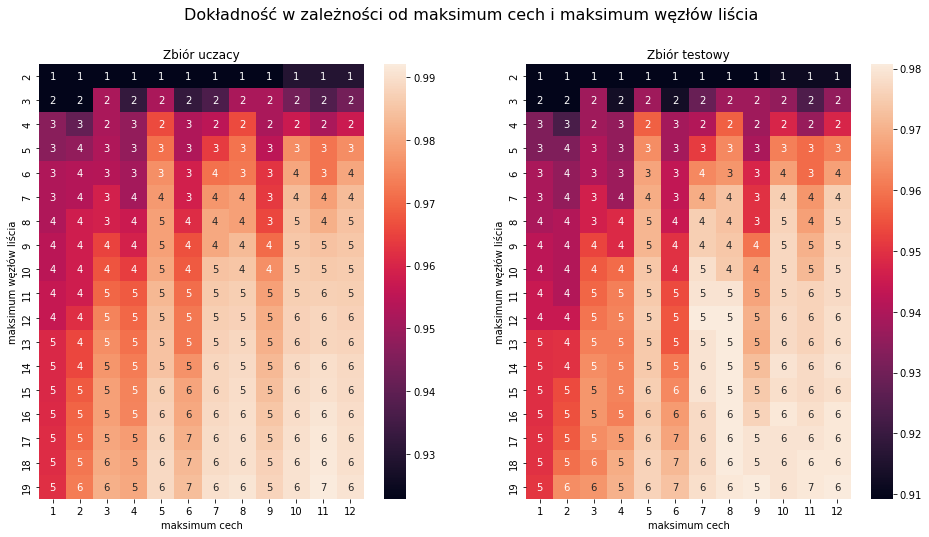

In [50]:
def params_heatmap(X, y, X_test, y_test, params, constants = {}, ax = None, title = 'Dokładność w zależności od parametrów', xlabel = 'parametr 1', ylabel = 'parametr 2'):

    p_1_name, p_1_values = params.popitem()
    p_2_name, p_2_values = params.popitem()
    scores = DataFrame(index=p_1_values, columns=p_2_values)
    depths = DataFrame(index=p_1_values, columns=p_2_values)

    for p_1 in p_1_values:
        for p_2 in p_2_values:
            model = DecisionTreeClassifier(random_state=42, **{p_1_name: p_1, p_2_name: p_2}, **constants)
            model.fit(X, y)
            scores.loc[p_1, p_2] = accuracy_score(y_test, model.predict(X_test))
            depths.loc[p_1, p_2] = model.get_depth()

    if ax is None:
        ax = plot.gca()

    heatmap(scores.astype(float), ax = ax, annot=depths)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

fig, axes = plot.subplots(1,2, figsize=(16,8))

fig.suptitle('Dokładność w zależności od maksimum cech i maksimum węzłów liścia', fontsize=16)
params_heatmap(X, y, X, y, {'max_features': range(1,len(X.columns) + 1), 'max_leaf_nodes': range(2,20,1)},
    title='Zbiór uczacy', xlabel='maksimum cech', ylabel='maksimum węzłów liścia', ax=axes[0])

params_heatmap(X, y, X_test, y_test, {'max_features': range(1,len(X.columns) + 1), 'max_leaf_nodes': range(2,20,1)},
    title='Zbiór testowy', xlabel='maksimum cech', ylabel='maksimum węzłów liścia', ax=axes[1])

### Najlepszy prosty model

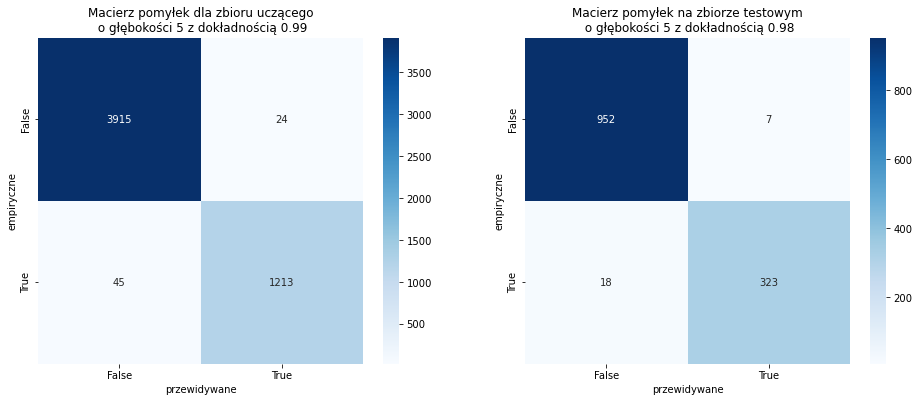

In [56]:
Mx = DecisionTreeClassifier(random_state=42, max_depth=10, max_features=7, max_leaf_nodes=12)
Mx.fit(X, y);

fig, axes = plot.subplots(1, 2, figsize=(16, 6))

tree_quality_plot(X, y, Mx, title='Macierz pomyłek dla zbioru uczącego\n', ax=axes[0])
tree_quality_plot(X_test, y_test, Mx, title='Macierz pomyłek na zbiorze testowym\n', ax=axes[1])

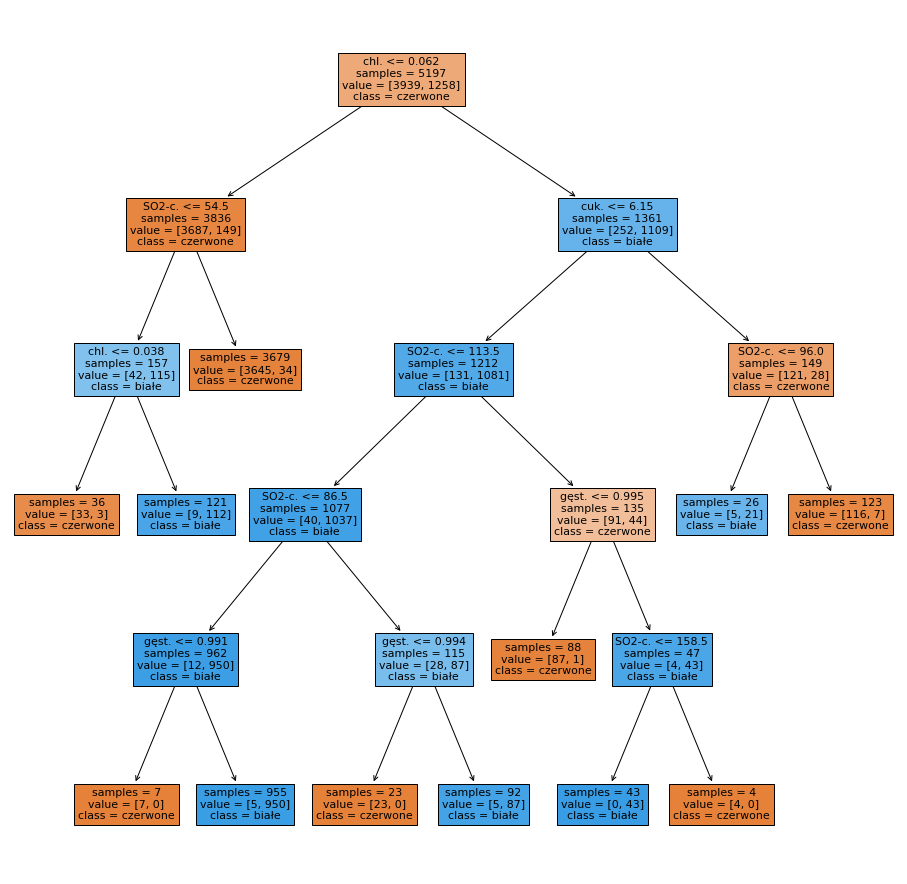

In [74]:
plot.figure(figsize=(16,16)) 
plot_tree(Mx, feature_names=K_s, filled=True, fontsize=11, impurity=False, class_names=['czerwone', 'białe']);


## Model pośredni

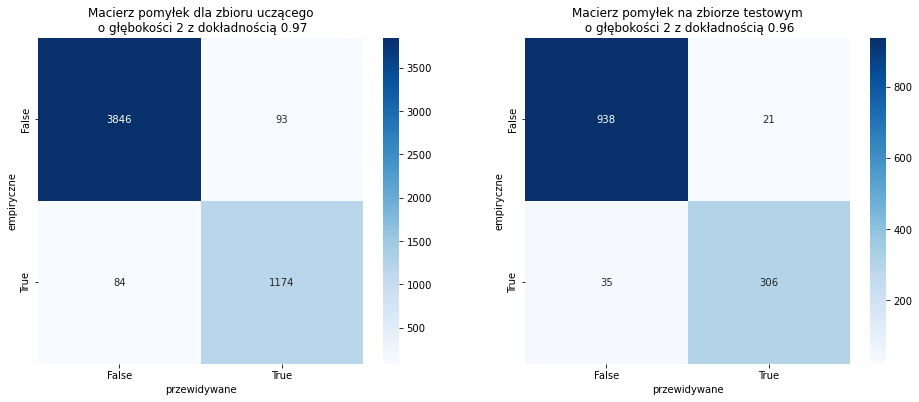

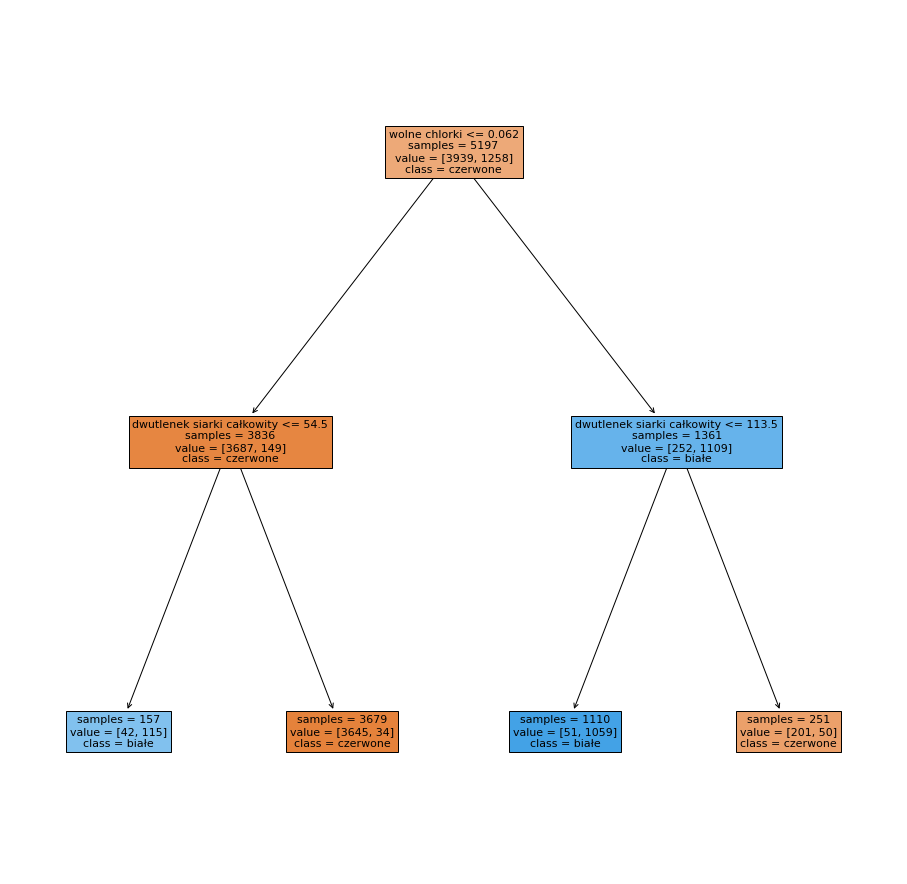

In [95]:
Mx = DecisionTreeClassifier(random_state=42, max_depth=10, max_features=5, max_leaf_nodes=4)
Mx.fit(X, y);

fig, axes = plot.subplots(1, 2, figsize=(16, 6))

tree_quality_plot(X, y, Mx, title='Macierz pomyłek dla zbioru uczącego\n', ax=axes[0])
tree_quality_plot(X_test, y_test, Mx, title='Macierz pomyłek na zbiorze testowym\n', ax=axes[1])

plot.figure(figsize=(16,16)) 
plot_tree(Mx, feature_names=K, filled=True, fontsize=11, impurity=False, class_names=['czerwone', 'białe']);

## Najprostszy model

In [96]:
Mx = DecisionTreeClassifier(random_state=42, max_depth=10, max_features=5, max_leaf_nodes=2)
Mx.fit(X, y);

fig, axes = plot.subplots(1, 2, figsize=(16, 6))

tree_quality_plot(X, y, Mx, title='Macierz pomyłek dla zbioru uczącego\n', ax=axes[0])
tree_quality_plot(X_test, y_test, Mx, title='Macierz pomyłek na zbiorze testowym\n', ax=axes[1])

plot.figure(figsize=(16,16)) 
plot_tree(Mx, feature_names=K, filled=True, fontsize=11, impurity=False, class_names=['czerwone', 'białe']);